In [1]:
# import numpy
import numpy as np
# read in COLVAR file 

In [2]:
# import mdtraj
import mdtraj as md
import gromacs

# use mdtraj to load xtc file 
traj_A = md.load_xtc('Inputs/sim1/traj_comp.xtc', top='Inputs/sim1/confout.gro')
traj_B = md.load_xtc('Inputs/sim2/traj_comp.xtc', top='Inputs/sim2/confout.gro')

In [3]:
# read in COLVAR file
colvar_A = np.genfromtxt('Inputs/sim1/COLVAR', skip_header=1)
colvar_B = np.genfromtxt('Inputs/sim2/COLVAR', skip_header=1)

phi_A_c = colvar_A[:,1]
psi_A_c = colvar_A[:,2]
phi_B_c = colvar_B[:,1]
psi_B_c = colvar_B[:,2]

In [4]:
psi_A = md.compute_psi(traj_A)
phi_A = md.compute_phi(traj_A)

psi_B = md.compute_psi(traj_B)
phi_B = md.compute_phi(traj_B)


Text(0, 0.5, 'Psi (rad)')

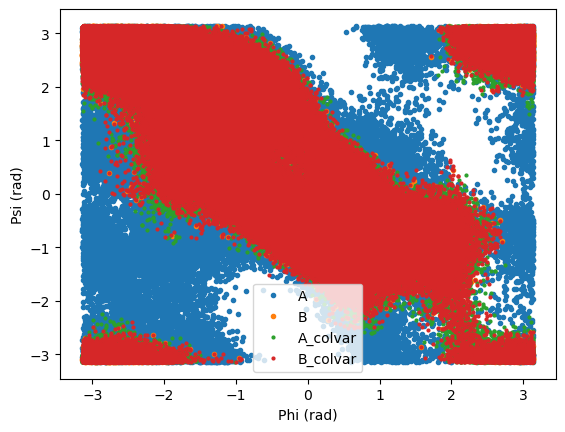

In [5]:
# plot phi and psi angles
import matplotlib.pyplot as plt
plt.plot(phi_A[1], psi_A[1], 'o', label='A', ms=3)
plt.plot(phi_B[1], psi_B[1], 'o', label='B', ms=3)
#plot phi and psi angles from colvar file
plt.plot(phi_A_c, psi_A_c, 'o', label='A_colvar', ms=2)
plt.plot(phi_B_c, psi_B_c, 'o', label='B_colvar', ms=2)
plt.legend()
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
# save figure
#plt.savefig('phi_psi-overlay2.png', dpi=300)

In [6]:
# compute the standard deviation of phi and psi
print('Phi A: ', np.std(phi_A[1])/2)
print('Psi A: ', np.std(psi_A[1])/2)
print('Phi B: ', np.std(phi_B[1])/2)
print('Psi B: ', np.std(psi_B[1])/2)

Phi A:  0.8280091285705566
Psi A:  0.8972337245941162
Phi B:  0.8209334015846252
Psi B:  0.7729316353797913


Text(0, 0.5, 'Psi (rad)')

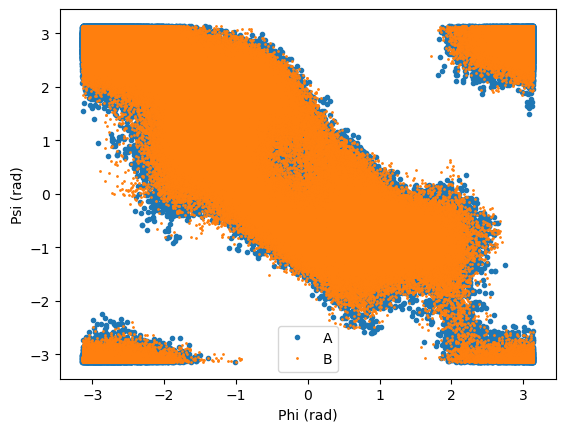

In [7]:
# read in the COLVAR file 
colvar_A_sim = np.genfromtxt('Inputs/sim1/COLVAR', skip_header=1) 
colvar_B_sim = np.genfromtxt('Inputs/sim2/COLVAR', skip_header=1)
phi_A_c_sim = colvar_A_sim[:,1]
psi_A_c_sim = colvar_A_sim[:,2]
phi_B_c_sim = colvar_B_sim[:,1]
psi_B_c_sim = colvar_B_sim[:,2]

# plot phi and psi angles
import matplotlib.pyplot as plt
plt.plot(phi_A_c_sim, psi_A_c_sim, 'o', label='A', ms=3)
plt.plot(phi_B_c_sim, psi_B_c_sim, 'o', label='B', ms=1)
plt.legend()
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')

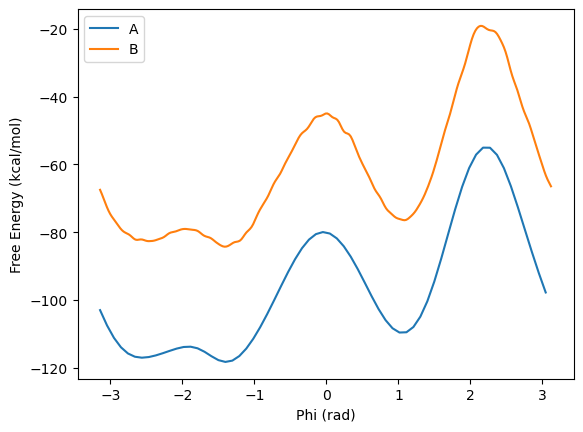

In [8]:
# read in A-hills1.dat file 
hills_A = np.genfromtxt('Inputs/sim1/A-hills1.dat', skip_header=1)
# read in B-hills1.dat file
hills_B = np.genfromtxt('Inputs/sim2/B-hills1.dat', skip_header=1)

# plot phi and psi angles
import matplotlib.pyplot as plt
plt.plot(hills_A[:,0], hills_A[:,1], '-', label='A', ms=3)
plt.plot(hills_B[:,0], hills_B[:,1], '-', label='B', ms=1)
# add x and y labels
plt.xlabel('Phi (rad)')
plt.ylabel('Free Energy (kcal/mol)')
plt.legend()


Text(0, 0.5, 'Free Energy (kcal/mol)')

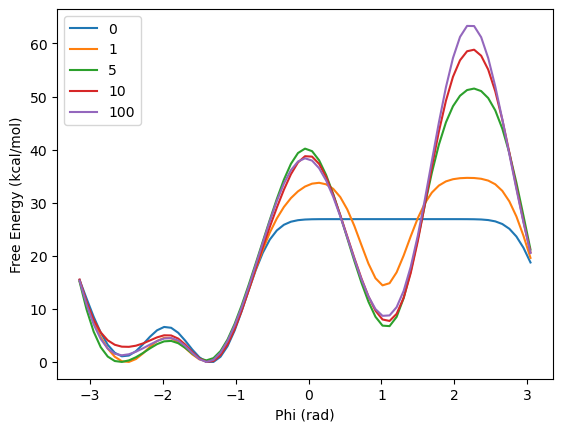

In [9]:
# read in all fes files 
fes_0 = np.genfromtxt('Inputs/sim1/fes_0.dat', skip_header=1) 
fes_1 = np.genfromtxt('Inputs/sim1/fes_1.dat', skip_header=1) 
fes_5 = np.genfromtxt('Inputs/sim1/fes_5.dat', skip_header=1)
fes_10 = np.genfromtxt('Inputs/sim1/fes_10.dat', skip_header=1)
fes_100 = np.genfromtxt('Inputs/sim1/fes_100.dat', skip_header=1)

# plot fes files
import matplotlib.pyplot as plt
plt.plot(fes_0[:,0], fes_0[:,1], '-', label='0', ms=3)
plt.plot(fes_1[:,0], fes_1[:,1], '-', label='1', ms=3)
plt.plot(fes_5[:,0], fes_5[:,1], '-', label='5', ms=3)
plt.plot(fes_10[:,0], fes_10[:,1], '-', label='10', ms=3)
plt.plot(fes_100[:,0], fes_100[:,1], '-', label='100', ms=3)
plt.legend()   
plt.xlabel('Phi (rad)')
plt.ylabel('Free Energy (kcal/mol)')

# save figure
#plt.savefig('FreeEnergy-Phi.png', dpi=300)

shape of data: (2275, 5)


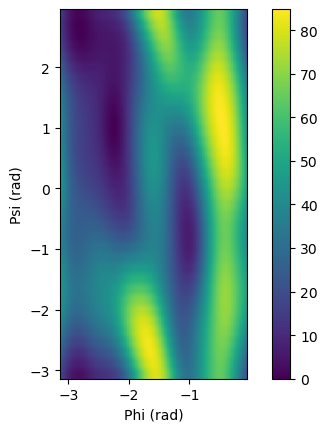

In [27]:
# read in 2d hills file 
hills_A_2d = np.loadtxt('/home/fm1484/comp-class/comp-lab-class/Week6/Inputs/sim1/2d-HILLS-dat/fes_100.dat')

phi=hills_A_2d[:,0]
psi=hills_A_2d[:,1]
fes=hills_A_2d[:,2]
print('shape of data:', hills_A_2d.shape)

# reshape according to Slack 
phi_new=phi[:33]
psi_new=psi[::33]
fes_new=fes.reshape(35,65)
plt.imshow(fes_new, origin='lower', extent=[phi_new[0], phi_new[-1], psi_new[0], psi_new[-1]])
plt.colorbar()
# add x and y labels 
plt.xlabel('Phi (rad)')
plt.ylabel('Psi (rad)')
# save figure
plt.savefig('2D-METAD-surface.png', dpi=300)